## Importando Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf

## Contrução da carteira

Em outro nível!

### Definido Parametros

In [5]:
# data dos aportes:
inicio = '2023-01-01'
final = '2023-09-18'

# Seleção dos Ativos da carteira
ativos = ['PETR4.SA', 'VALE3.SA', 'BBDC4.SA', 'ITSA4.SA', 'ABEV3.SA', 'WEGE3.SA', 'CYRE3.SA', 'UGPA3.SA', 'TAEE4.SA', 'BBAS3.SA']

# Proporções de peso de investimento por ação:
pesos = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1 , 0.1, 0.1, 0.1, 0.1])

# Meu total de Compra / Aporte
total_reais = 25000

# Calcula o valor investido em cada ativo com base nas proporções
# Criando um Dict Comprehension - É outro nível!
valores_investidos_por_ativo = {ativo: proporcao * total_reais for ativo, proporcao in zip(ativos, pesos)}
valores_investidos_por_ativo

{'PETR4.SA': 2500.0,
 'VALE3.SA': 2500.0,
 'BBDC4.SA': 2500.0,
 'ITSA4.SA': 2500.0,
 'ABEV3.SA': 2500.0,
 'WEGE3.SA': 2500.0,
 'CYRE3.SA': 2500.0,
 'UGPA3.SA': 2500.0,
 'TAEE4.SA': 2500.0,
 'BBAS3.SA': 2500.0}

In [6]:
carteira = yf.download(ativos, start=inicio, end=final)['Adj Close']
carteira

[*********************100%%**********************]  10 of 10 completed


,ABEV3.SA,BBAS3.SA,BBDC4.SA,CYRE3.SA,ITSA4.SA,PETR4.SA,TAEE4.SA,UGPA3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,
2023-01-02,14.19,30.951462,13.845820,12.418038,8.072248,18.442509,10.888357,11.703218,84.917046,37.630516
2023-01-03,14.17,30.374496,13.158725,11.867199,7.869475,17.975815,10.663469,11.517143,84.765060,36.692223
2023-01-04,14.25,30.765348,13.196322,12.331064,7.937068,18.547112,10.672839,11.791360,84.917046,36.939140
2023-01-05,14.29,32.170540,13.769665,12.659635,8.052937,19.214968,10.663469,11.948056,86.341820,37.018154
2023-01-06,14.32,32.617226,14.155029,13.249128,8.188116,19.102320,11.103876,12.085165,87.709610,37.561378
...,...,...,...,...,...,...,...,...,...,...
2023-09-11,13.87,47.045803,14.650000,22.209999,9.230000,33.369999,11.610000,18.959999,67.669998,35.279999
2023-09-12,13.71,47.299999,14.830000,22.540001,9.270000,33.529999,11.640000,19.110001,67.620003,35.650002
2023-09-13,13.64,47.259998,14.890000,22.559999,9.270000,33.029999,11.640000,18.330000,67.360001,36.930000


#### Não faz sentido!
não faz sentido eu plotar um gráfico agora dessa minha carteira pois os valores vão está muito distoantes. Para ajustar isso precisamos normalizar o gráfico!

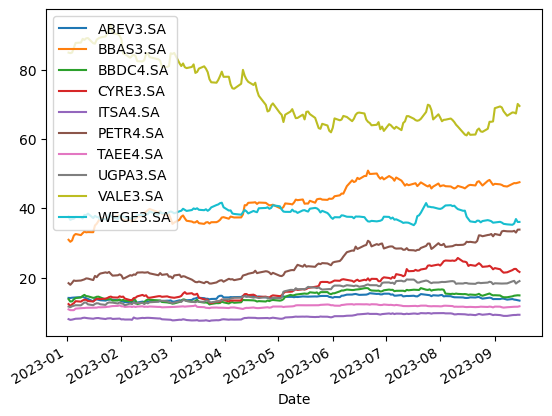

In [7]:
carteira.plot();

#### Normalizando a Carteira:

pegamos nossa carteira e dividimos pela primeira linha:

* Para que todos os ativos comecem na base 1

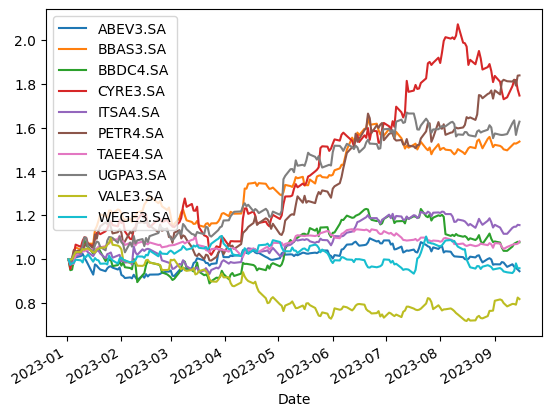

In [8]:
(carteira/carteira.iloc[0]).plot();

### Retorno Diário e Retorno Acumulado

In [12]:
retornos = carteira.pct_change().dropna()
retornos.head(2)

,ABEV3.SA,BBAS3.SA,BBDC4.SA,CYRE3.SA,ITSA4.SA,PETR4.SA,TAEE4.SA,UGPA3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,
2023-01-03,-0.001409,-0.018641,-0.049625,-0.044358,-0.025120,-0.025305,-0.020654,-0.015899,-0.001790,-0.024934
2023-01-04,0.005646,0.012868,0.002857,0.039088,0.008589,0.031781,0.000879,0.023809,0.001793,0.006729


#### Retornos Diários da carteira

In [17]:
retorno_carteira_diario = (retornos*pesos).sum(axis=1)

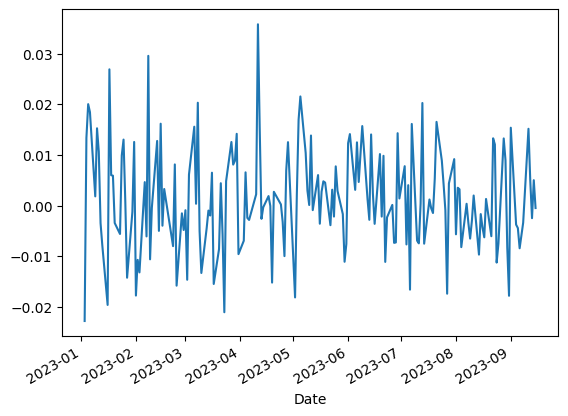

In [18]:
retorno_carteira_diario.plot();

#### Retornos Acumulado

In [22]:
retorno_acumulado_carteira = (1 + retorno_carteira_diario).cumprod() - 1

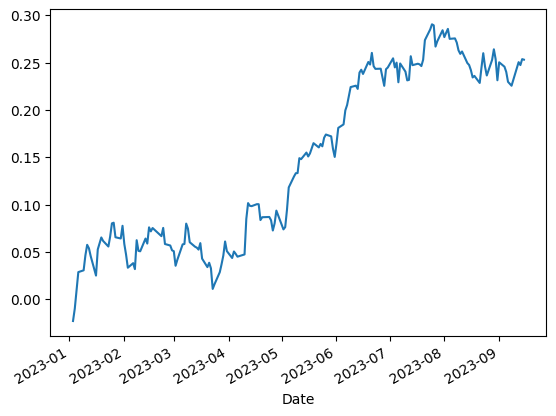

In [23]:
retorno_acumulado_carteira.plot();

### Comparativo de desempenho

In [21]:
ibov = yf.download('^BVSP', start=inicio, end=final)['Adj Close']

[*********************100%%**********************]  1 of 1 completed


In [24]:
ibov_retorno = ibov.pct_change()
retorno_acumulado_ibov = (1 + ibov_retorno).cumprod() - 1

In [25]:
# Criando um DF vazio para receber os dois retornos acumulados
# Para podermos fazer o comparativo:
retorno_comparativo = pd.DataFrame()
retorno_comparativo['Retorno Carteira'] = retorno_acumulado_carteira
retorno_comparativo['IBOV'] = retorno_acumulado_ibov
retorno_comparativo = retorno_comparativo.dropna()

In [26]:
retorno_comparativo

,Retorno Carteira,IBOV
Date,,
2023-01-03,-0.022774,-0.020775
2023-01-04,-0.009675,-0.009795
2023-01-05,0.010182,0.010736
2023-01-06,0.028845,0.023126
2023-01-09,0.030737,0.026801
...,...,...
2023-09-11,0.244213,0.098772
2023-09-12,0.250482,0.108972
2023-09-13,0.247395,0.110927


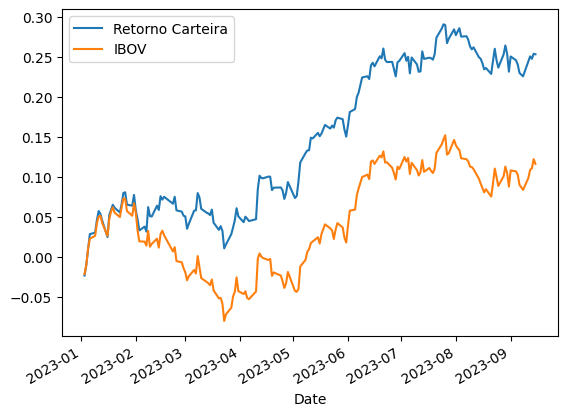

In [27]:
retorno_comparativo.plot();